In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

In [46]:
car = pd.read_csv("C:\PGPDS\ML Projects\Car_Price_Prediction\Car_sales_data.csv")
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [47]:
car.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [48]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Drop Model feature

In [49]:
# In Model column There are three hundred and twelve unique models. 
# would mean more than 300 dummies,
car = car.drop(labels='Model', axis=1)

In [50]:
car.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [51]:
# so we are simply droping all nan values as they're less than 5%
car_no_mv = car.dropna()

### Data Exploration

#### Exploring DIstributions for the variables

Text(0.5, 1.0, 'Car Price Distribution Plot')

<Figure size 1440x360 with 0 Axes>

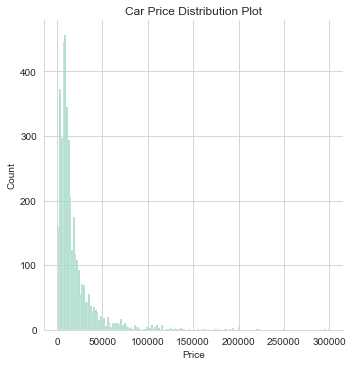

In [52]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize =[20,5])
sns.displot(car_no_mv['Price'])
plt.title('Car Price Distribution Plot')

Text(0.5, 1.0, 'EngineV Distribution Plot')

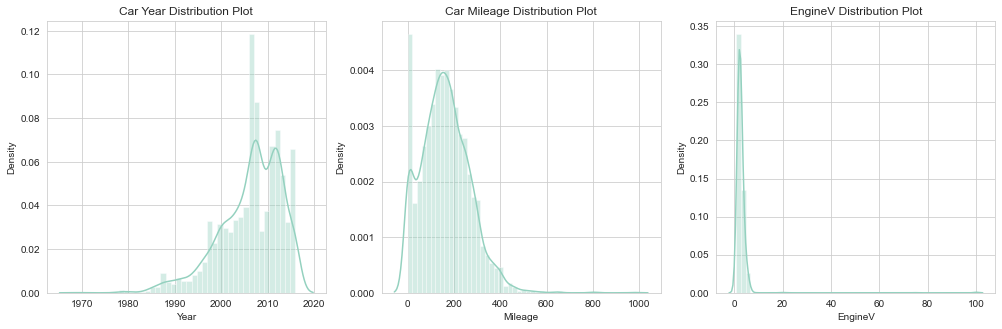

In [53]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(car_no_mv['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(car_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(car_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

#### Now its clear that some outliers present in Price, Year, Mileage & EngineV 

## Dealing with Outliers

In [54]:
#  Price
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = car_no_mv['Price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = car_no_mv[car_no_mv['Price']<q]



Text(0.5, 1.0, 'Car Price Distribution Plot')

<Figure size 1440x360 with 0 Axes>

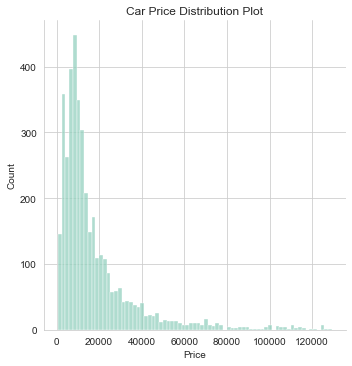

In [55]:
#Check the PDF once again
plt.figure(figsize=[20,5])
sns.displot(data_1['Price'])
plt.title('Car Price Distribution Plot')

#### We have fewer outliers now

In [56]:
## Mileage
q1 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']< q1]

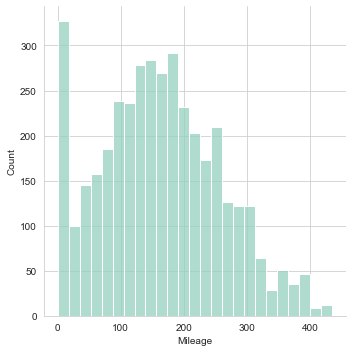

In [57]:
#Let's check what the distribution looks like now
sns.displot(data_2['Mileage'])

In [58]:
## Year
q2 = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q2]

Text(0.5, 1.0, 'Car year Distribution Plot')

<Figure size 792x360 with 0 Axes>

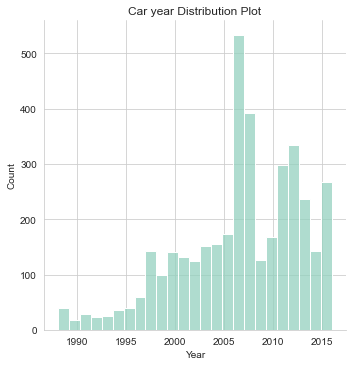

In [59]:
plt.figure(figsize=[11,5])
sns.displot(data_3['Year'])
plt.title('Car year Distribution Plot')

Text(0.5, 1.0, 'EngineV Distribution Plot')

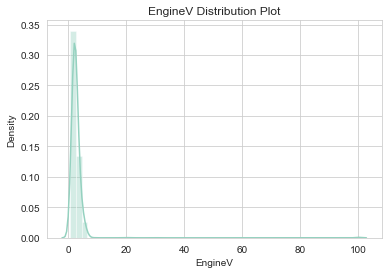

In [60]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(car_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

In [61]:
# Car engine volumes are usually below 6.5l (Domain knowledge supremacy !)
data_4 = data_3[data_3['EngineV']<6.5]

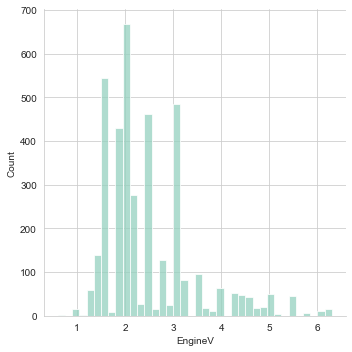

In [62]:
sns.displot(data_4['EngineV'])

In [63]:
#Reset index
cleaned_data = data_4.reset_index(drop = True)

In [64]:
cleaned_data.describe()

,Price,Mileage,EngineV,Year
count,3867.00,3867.00,3867.00,3867.00
mean,18194.46,160.54,2.45,2006.71
std,19085.86,95.63,0.95,6.10
min,800.00,0.00,0.60,1988.00
25%,7200.00,91.00,1.80,2003.00
50%,11700.00,157.00,2.20,2008.00
75%,21700.00,225.00,3.00,2012.00
max,129222.00,435.00,6.30,2016.00


Text(0.5, 1.0, 'Price and EngineV')

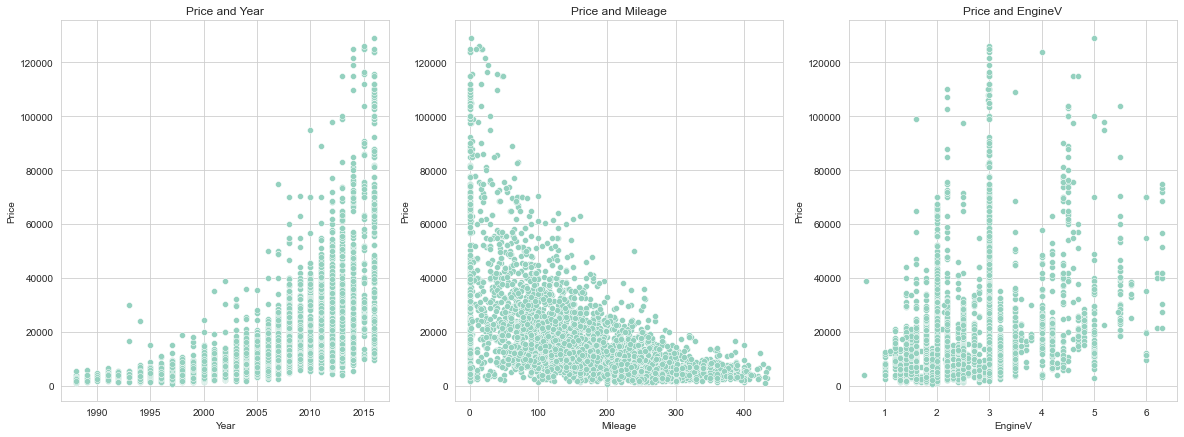

In [65]:
# Scatter Plot of independent variables vs dependent variabels
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(y='Price',x='Year',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(y='Price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV")

The patterns we observe are not linear which implies that we can't run a linear regression in this case. These implies that the distribution of Price is not normal. We can transform one or more variables to check if it helps



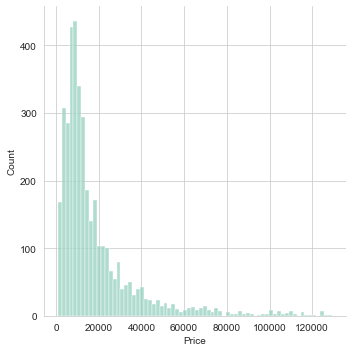

In [66]:
sns.displot(cleaned_data['Price'])

Since the distribution of Price with other variables seems to be exponential, a log transform might help here

In [67]:
log_price = np.log(cleaned_data['Price'])

#adding it our dataframe
cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81


Text(0.5, 1.0, 'Log price and EngineV')

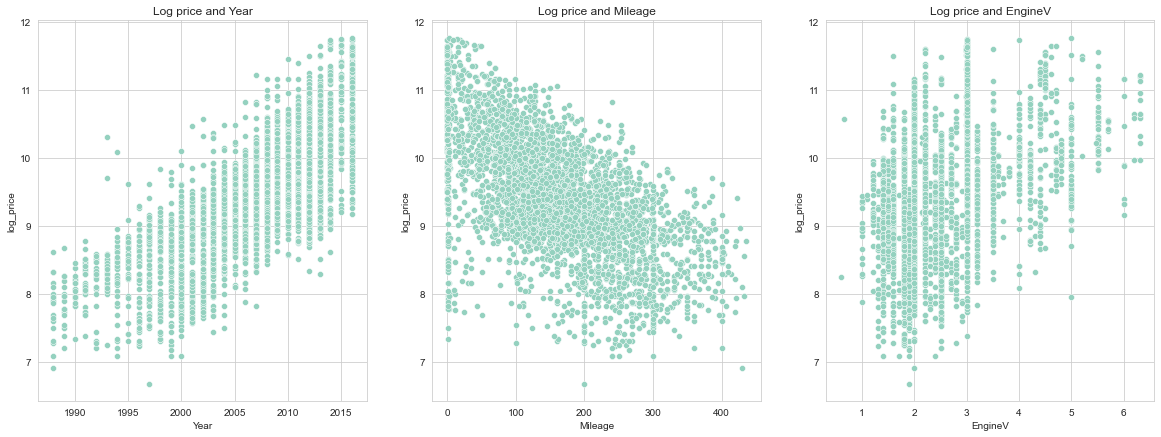

In [68]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV")



We can see a clear linear relationship between the variables now

In [69]:
# Since we will be using the log price variable, we can drop the old 'Price' one
cleaned_data = cleaned_data.drop(['Price'],axis=1)

### Checking for multicollinearity

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF']=[vf(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


Fixing the Multicollinearity

In [71]:
# We can drop Year as it has a VIF > 10
data_no_multi = cleaned_data.drop('Year',axis=1)
data_no_multi.head()


,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.50
3,Audi,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,9.81


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
variables = cleaned_data[['Mileage','EngineV']]
vif = pd.DataFrame()
vif['VIF']=[vf(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,2.81,Mileage
1,2.81,EngineV


We see that VIF for EngineV has also come down as a result of dropping year

## Feature Selection

In [73]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multi.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Mileage        0.61
Registration   0.46
EngineV        0.41
Body           0.39
Brand          0.10
Engine Type    0.01
dtype: float64


<AxesSubplot:>

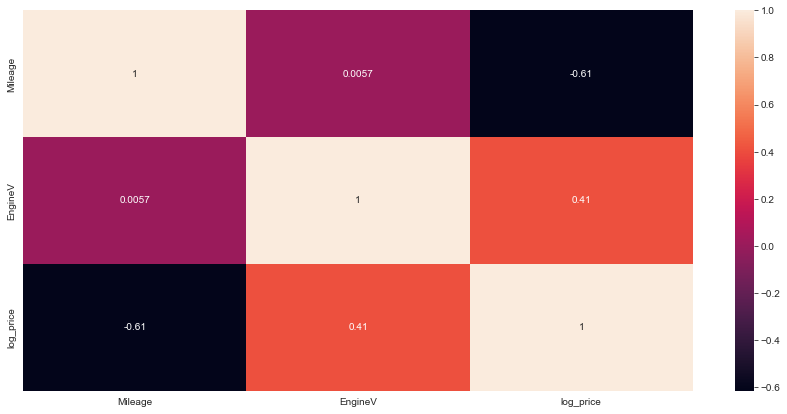

In [74]:
#Correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multi.corr(),annot= True)

### Feature Importance

In [75]:
# Importance of feature using Extra tree Regressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis =1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

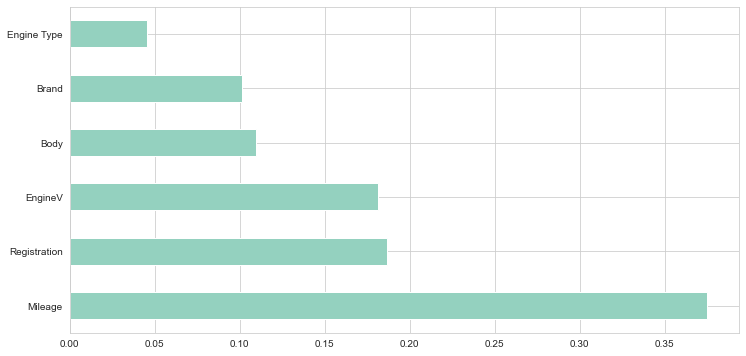

In [76]:
#plot feature importance, some visualization always help
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(6).plot(kind='barh')

In [77]:
print(feat_importances.sort_values(ascending=False))

Mileage        0.38
Registration   0.19
EngineV        0.18
Body           0.11
Brand          0.10
Engine Type    0.05
dtype: float64


## Categorical Features

In [78]:
#Creating Dummy Variables
data_with_dummies = pd.get_dummies(data_no_multi,drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Model Development

### Declaring dependent and independent variable

In [79]:
X = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

### Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Mileage','EngineV']])

StandardScaler()

In [81]:
# Scaling 
inputs_scaled = scaler.transform(X[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns = ['Mileage','EngineV'])
input_scaled2 = scaled_data.join(X.drop(['Mileage','EngineV'],axis = 1))

### Training and Test Data

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_scaled2,y,test_size = 0.2,random_state = 365)


## Linear Regression Model

In [83]:
#Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

#Training MOdel
lr.fit(X_train,y_train)

#Model Summary
y_pred_lr = lr.predict(X_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7726984972665856
RMSE : 0.4298206539563799


In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#Training Model
rf.fit(X_train,y_train)

#Model prediction & Summary 
y_pred_rf = rf.predict(X_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_Square :",r_squared)
print("RMSE :",rmse)

R_Square : 0.8104329091869631
RMSE : 0.39252525078903294


## GBT Regressor Model

In [85]:
#Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

#Training Model
gbt.fit(X_train,y_train)

#Model Summary
y_pred_gbt=gbt.predict(X_test)
r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)


R_squared : 0.8124884560131451
RMSE : 0.3903913012080389


### The best accuracy is given by GBT Regressor ~ 81.25% accuracy (R_Squared = 0.8124884560131451)

In [86]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_rf), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.head()

,Predicted Price,Actual Price,Residual,Difference%
0,5948.61,2300.00,-3648.61,158.64
1,3037.74,2800.00,-237.74,8.49
2,6227.72,2500.00,-3727.72,149.11
3,6577.72,6400.00,-177.72,2.78
4,9972.96,9150.00,-822.96,8.99
